# - First try about my project - 

### Importando as bibliotecas e lendo o arquivo .csv

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../Dados_Ovinos.csv', sep=',')

In [4]:
df

,Rebanho,Data da coleta,Animal,AOL,POL,COL,EGS,ECC,PESOVIVO,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,Ricardo,23/02/2022,amarelo,"10,26","2,53","5,19","4,68",NaN,"47,1","21,6","45,86",1.0,70.0,70.0,73.0,NaN,89.0,43.0,NaN
1,Ricardo,23/02/2022,vermelho,"8,71","2,07","5,13","3,71",NaN,"37,35","17,4","46,59",1.0,67.0,70.0,67.0,NaN,79.0,41.0,NaN
2,Ricardo,23/02/2022,azul,"10,01","2,4","5,19","2,82",NaN,"37,3","16,3","43,70",2.0,72.0,63.0,61.0,NaN,76.0,41.0,NaN
3,Ricardo,23/02/2022,branco,"9,55","2,42","5,6","2,63",NaN,"33,55","17,3","51,56",2.0,67.0,67.0,68.0,NaN,76.0,32.0,NaN
4,Ricardo,23/02/2022,rosa,"9,83","2,56","5,2","3,14",NaN,35,15,"42,86",2.0,57.0,62.0,64.0,NaN,78.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,CTT,04/05/2022,4445,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,CTT,04/05/2022,7906,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,CTT,04/05/2022,7997,NaN,NaN,NaN,NaN,"3,5",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,CTT,04/05/2022,7859,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df = df.drop('Rebanho', axis=1)
df = df.drop('Data da coleta', axis=1)
df = df.drop('Animal', axis=1)
df

,AOL,POL,COL,EGS,ECC,PESOVIVO,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,"10,26","2,53","5,19","4,68",NaN,"47,1","21,6","45,86",1.0,70.0,70.0,73.0,NaN,89.0,43.0,NaN
1,"8,71","2,07","5,13","3,71",NaN,"37,35","17,4","46,59",1.0,67.0,70.0,67.0,NaN,79.0,41.0,NaN
2,"10,01","2,4","5,19","2,82",NaN,"37,3","16,3","43,70",2.0,72.0,63.0,61.0,NaN,76.0,41.0,NaN
3,"9,55","2,42","5,6","2,63",NaN,"33,55","17,3","51,56",2.0,67.0,67.0,68.0,NaN,76.0,32.0,NaN
4,"9,83","2,56","5,2","3,14",NaN,35,15,"42,86",2.0,57.0,62.0,64.0,NaN,78.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,"3,5",NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Tratar os floats que foram inseridos com virgula ao inves de ponto.

def replaceFloat(nameColumns):
    aux = [float(str(x).replace(',', '.')) for x in df[nameColumns]]
    return aux

for x in df:
    df[x] = replaceFloat(x)

df

,AOL,POL,COL,EGS,ECC,PESOVIVO,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,10.26,2.53,5.19,4.68,NaN,47.10,21.6,45.86,1.0,70.0,70.0,73.0,NaN,89.0,43.0,NaN
1,8.71,2.07,5.13,3.71,NaN,37.35,17.4,46.59,1.0,67.0,70.0,67.0,NaN,79.0,41.0,NaN
2,10.01,2.40,5.19,2.82,NaN,37.30,16.3,43.70,2.0,72.0,63.0,61.0,NaN,76.0,41.0,NaN
3,9.55,2.42,5.60,2.63,NaN,33.55,17.3,51.56,2.0,67.0,67.0,68.0,NaN,76.0,32.0,NaN
4,9.83,2.56,5.20,3.14,NaN,35.00,15.0,42.86,2.0,57.0,62.0,64.0,NaN,78.0,29.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

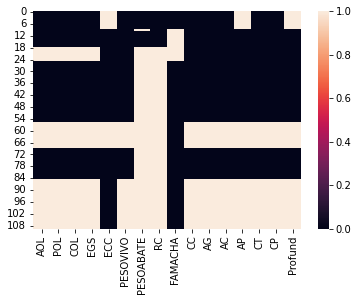

In [8]:
sns.heatmap(df.isnull())

### Tratando alguns valores NaN
#### Lembrar de variar os procedimentos dos valores NaN's afim de encontrar a melhor forma de trata-los

In [9]:
df.isnull().sum() #check for missing values

AOL          45
POL          45
COL          45
EGS          45
ECC          22
PESOVIVO     38
PESOABATE    93
RC           92
FAMACHA      16
CC           38
AG           38
AC           38
AP           47
CT           38
CP           38
Profund      47
dtype: int64

In [10]:
df.fillna(0, inplace=True) # para preencher valores NaN com uma constante como 0

<AxesSubplot:>

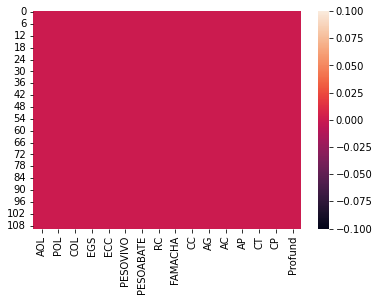

In [11]:
sns.heatmap(df.isnull())

In [12]:
df

,AOL,POL,COL,EGS,ECC,PESOVIVO,PESOABATE,RC,FAMACHA,CC,AG,AC,AP,CT,CP,Profund
0,10.26,2.53,5.19,4.68,0.0,47.10,21.6,45.86,1.0,70.0,70.0,73.0,0.0,89.0,43.0,0.0
1,8.71,2.07,5.13,3.71,0.0,37.35,17.4,46.59,1.0,67.0,70.0,67.0,0.0,79.0,41.0,0.0
2,10.01,2.40,5.19,2.82,0.0,37.30,16.3,43.70,2.0,72.0,63.0,61.0,0.0,76.0,41.0,0.0
3,9.55,2.42,5.60,2.63,0.0,33.55,17.3,51.56,2.0,67.0,67.0,68.0,0.0,76.0,32.0,0.0
4,9.83,2.56,5.20,3.14,0.0,35.00,15.0,42.86,2.0,57.0,62.0,64.0,0.0,78.0,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,0.00,0.00,0.00,0.00,1.0,0.00,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
106,0.00,0.00,0.00,0.00,2.0,0.00,0.0,0.00,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107,0.00,0.00,0.00,0.00,3.5,0.00,0.0,0.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
108,0.00,0.00,0.00,0.00,3.0,0.00,0.0,0.00,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Treinando o modelo

In [13]:
X = df.drop('AOL', axis=1)
y = df['AOL']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [15]:
print(X_train, X_test)

      POL   COL   EGS  ECC  PESOVIVO  PESOABATE     RC  FAMACHA    CC    AG  \
35   2.18  4.09  3.30  3.0     43.10        0.0   0.00      4.0  65.0  73.0   
74   2.23  4.05  1.87  2.5     33.40        0.0   0.00      3.0  67.0  60.0   
75   2.50  4.67  3.50  3.0     44.25        0.0   0.00      2.0  72.0  67.0   
96   0.00  0.00  0.00  2.0      0.00        0.0   0.00      3.0   0.0   0.0   
3    2.42  5.60  2.63  0.0     33.55       17.3  51.56      2.0  67.0  67.0   
..    ...   ...   ...  ...       ...        ...    ...      ...   ...   ...   
28   1.97  4.19  2.47  2.5     34.60        0.0   0.00      3.0  66.0  62.0   
64   0.00  0.00  0.00  0.0      0.00        0.0   0.00      5.0   0.0   0.0   
15   2.23  4.26  1.70  2.0     34.95       15.2  43.49      0.0  58.0  70.0   
100  0.00  0.00  0.00  2.0      0.00        0.0   0.00      4.0   0.0   0.0   
9    2.21  4.87  2.98  2.5     38.00        0.0   0.00      0.0  70.0  69.0   

       AC    AP    CT    CP  Profund  
35   70.0  3

In [16]:
print(y_train, y_test)

35      9.40
74      7.83
75     10.30
96      0.00
3       9.55
       ...  
28      6.70
64      0.00
15      7.88
100     0.00
9       8.38
Name: AOL, Length: 88, dtype: float64 101     0.00
79      7.59
26      8.30
43      8.04
52     10.07
87      0.00
37     10.90
41      7.74
2      10.01
38      8.01
48     11.31
76      9.75
108     0.00
102     0.00
1       8.71
10      6.13
39      7.50
92      0.00
63      0.00
47      5.73
19      0.00
14      9.31
Name: AOL, dtype: float64


In [17]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [18]:
importance = model.coef_

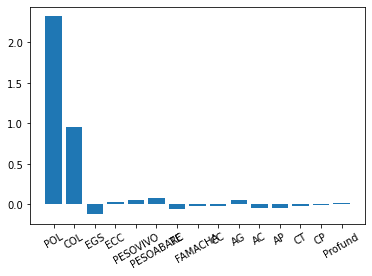

In [19]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

### Melhores valores para apurar o AOL

In [20]:
X = pd.DataFrame(np.c_[df['POL'], df['COL']], columns = ['POL', 'COL'])
y = df['AOL']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [22]:
# Fit the model
model = LinearRegression()
model = model.fit(X_train, y_train)

In [23]:
importance = model.coef_

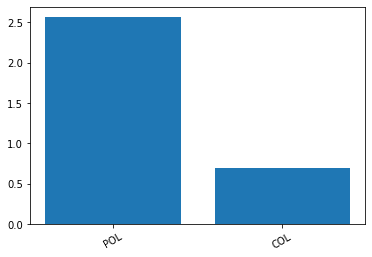

In [24]:
#histogram
plt.bar([x for x in range (len(importance))], importance)
plt.xticks([x for x in range (len(importance))], X.columns.values.tolist(), rotation=30)
plt.show()

#### Avaliando o modelo

In [25]:
y_test_predict = model.predict(X_test)

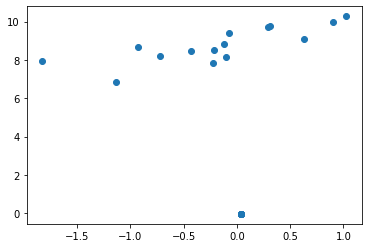

In [26]:
plt.scatter(y_test-y_test_predict,y_test_predict)
plt.show()

#### MSE -> mean_squared_error
#### R2 -> pontuação R2 eh o coeficiente de determinação, é outra métrica para avaliar seu modelo de forma confiável.)

In [27]:
# model evaluation for training set
y_train_predict = model.predict(X_train)

rmse_train = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2_train = r2_score(y_train, y_train_predict)

print(f"RMSE for training is {rmse_train}")
print(f"R2 score for training is {r2_train}")

RMSE for training is 0.6413114880090406
R2 score for training is 0.9795611921066142


In [28]:
# model evaluation for training set
y_test_predict = model.predict(X_test)

rmse_test = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
r2_test = r2_score(y_test, y_test_predict)

print(f"RMSE for testing is {rmse_test}")
print(f"R2 score for testing is {r2_test}")

RMSE for testing is 0.6327068496369798
R2 score for testing is 0.9774306191600312


#### Evaluation Metrics

In [29]:
print(model.intercept_)

-0.042622162740795666


In [30]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
POL,2.565938
COL,0.694159


In [31]:
y_pred = model.predict(X_test)

In [32]:
df_aux = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df_aux

,Actual,Predicted
101,0.00,-0.042622
79,7.59,7.819274
26,8.30,8.513694
43,8.04,8.142687
52,10.07,9.762690
87,0.00,-0.042622
37,10.90,9.998704
41,7.74,8.668761
2,10.01,9.718313
38,8.01,8.446010


In [33]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42064475546240077
Mean Squared Error: 0.40031795757755173
Root Mean Squared Error: 0.6327068496369798
